# How to use `pauli_grid`

[Hello Quantum](https://helloquantum.mybluemix.net/) is a project based on the idea of visualizing two qubit states and gates, and making them accessible to a non-specialist audience.

The qreative package includes tools to use the 'Hello Quantum' visualizations and puzzles in Python. These were used to create the puzzles in the [Hello_Qiskit](https://github.com/Qiskit/qiskit-tutorials/blob/master/community/games/Hello_Qiskit.ipynb) notebook.

To use it in a Jupyter notebook, use matplotlib magic.

In [1]:
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../')
import qreative

The import here was very simple, because this notebook is in the same folder as the *hello_quantum.py* file. If this is not the case, you'll have to change the path. See the [Hello_Qiskit](../hello_quantum.ipynb) notebook for an example of this.

Once the import has been done, you can set up and display the visualization.

<IPython.core.display.Javascript object>


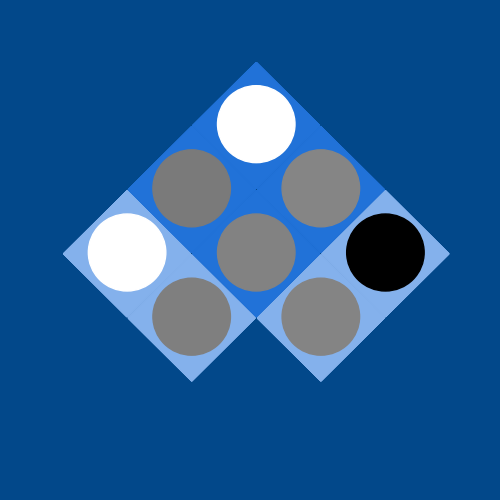

In [2]:
grid = qreative.pauli_grid()
grid.update_grid()

Note that it is in the initialization of a `pauli_grid` object that you can use the standard kwargs `device`, `noisy` and `shots` as explained in [the README](README.md).

This pauli grid has attributes and methods which create and run quantum circuits with Qiskit. Specifically, you can access the underlying two qubit quantum circuit with the `qc` attribute, and the quantum and classical registers with `qr` and `cr`.

In [3]:
for gate in [['x','1'],['h','0'],['z','0'],['h','1'],['z','1']]:
    command = 'grid.qc.'+gate[0]+'(grid.qr['+gate[1]+'])'
    eval(command)
    grid.update_grid()

There is also an alternative visualization, which can be used to better represent non-Clifford gates.

<IPython.core.display.Javascript object>


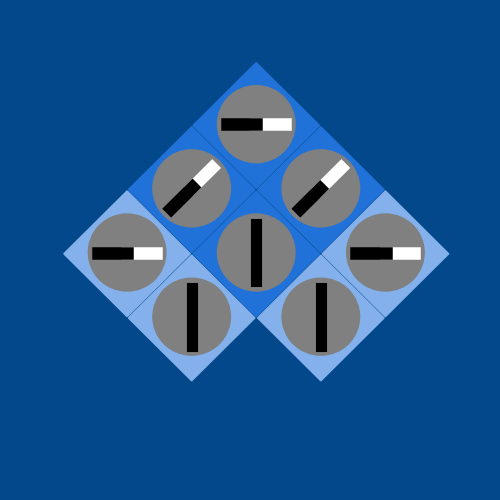

In [4]:
grid = qreative.pauli_grid(mode='line')
grid.update_grid()

The default grid has 8 circles, and represents measurement results for the $Z$ and $X$ basis measurements (see the [Hello_Qiskit](https://github.com/Qiskit/qiskit-tutorials/blob/master/community/games/Hello_Qiskit.ipynb) notebook for more on this). This does not fully represent the state of two qubits. For that we need a 15 circle grid that also includes $Y$ measurements.

Note that this extended grid is not yet compatible with the `lines=True` visualization.

<IPython.core.display.Javascript object>


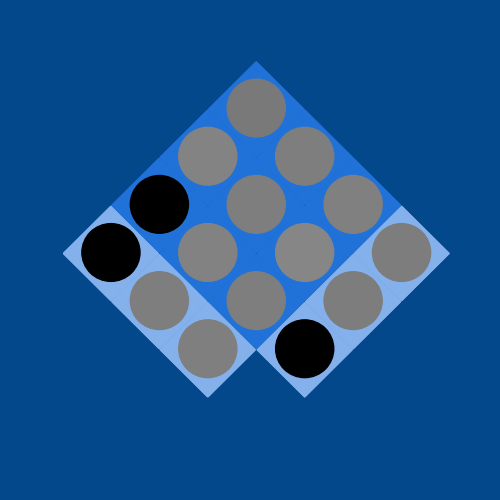

In [5]:
grid = qreative.pauli_grid(y_boxes=True)
grid.update_grid()

In [6]:
grid.qc.h(grid.qr[0])
grid.update_grid()

To see exactly what each circle represents, use `labels=True` when calling `update_grid()`.

<IPython.core.display.Javascript object>


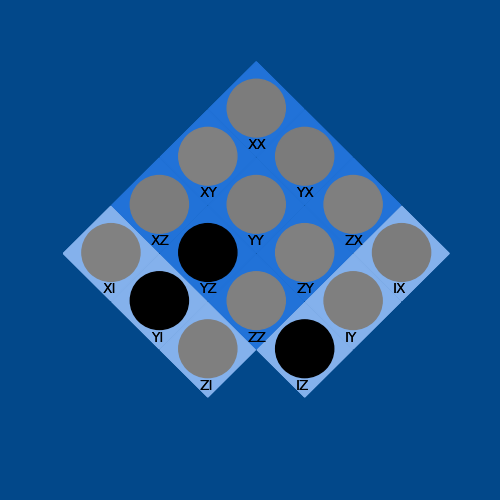

In [7]:
grid = qreative.pauli_grid(y_boxes=True)
grid.update_grid(labels=True)

Here the `ZI` circle represents the result for a $Z$ measurement on qubit 0 (the one on the left): black means the result is certain to be `0`, white means `1` and grey means random. The `ZX` circle compares the results of a $Z$ measurement on qubit 0 with an $X$ measurement on qubit 1: black for same, white for different and grey for random. From this, you should be able to infer the rest.

One way to get the $Y$ columns to be something other than random is to use the `s` gate. This swaps the $X$ and $Y$ columns of a qubit (along with some inversions here and there).

In [8]:
grid.qc.h(grid.qr[0])
grid.qc.s(grid.qr[0])
grid.update_grid(labels=True)

Finally, here's what a grid looks like with a little noise.

<IPython.core.display.Javascript object>


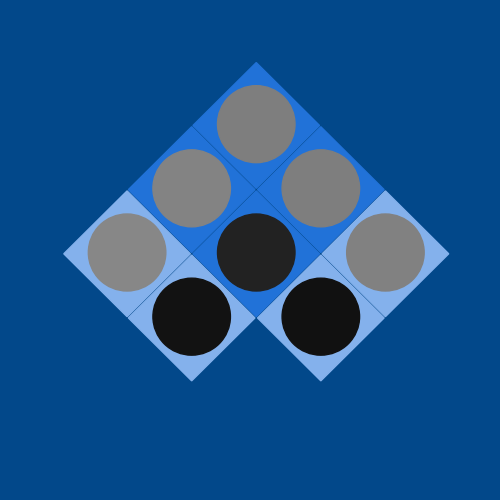

In [10]:
grid = qreative.pauli_grid(noisy=True)
grid.update_grid()

It's not very different for this simple `00` state. But you can see that the black circles aren't quite as black as they should be.